In [69]:
from pandas import DataFrame
import random
import numpy as np

def generate_polars_points(n: int, r: int) -> tuple[list[float], list[float]]:
    ro = [r * np.sqrt(random.random()) for _ in range(n)]
    theta = [2 * np.pi * random.random() for _ in range(n)]
    return ro, theta

def classify_polars_points(ro: list[float], theta: list[float]) -> DataFrame:
    def fun1(t):
        return t/(4*np.pi)

    def fun2(t):
        return (t+np.pi)/(4*np.pi)
    
    def condition(t, r):
        return (fun1(t) <= r and r <= fun2(t) 
                or fun1(t+2*np.pi) <= r and r <= fun2(t+2*np.pi)
                or fun1(t-2*np.pi) <= r and r <= fun2(t-2*np.pi))

    classes = [1 if condition(t, r) else 0 for (r,t) in zip(ro, theta)]
    
    return classes

def generate_dataframe(n: int, r: int):
    ro, theta = generate_polars_points(n, r)
    classes = classify_polars_points(ro, theta)
    
    xs = [r * np.cos(t) for (r, t) in zip(ro, theta)]
    ys = [r * np.sin(t) for (r, t) in zip(ro, theta)]

    df = DataFrame({"X":xs, "Y":ys, "CLASS": classes})
    return df

<AxesSubplot:xlabel='X', ylabel='Y'>

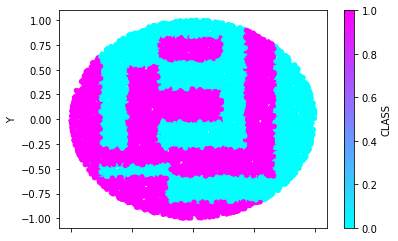

In [70]:
from sklearn.tree import DecisionTreeClassifier

df_150 = generate_dataframe(150, 1)

df_test = generate_dataframe(10000, 1)

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf.fit(df_150.loc[:,["X", "Y"]], df_150.loc[:,"CLASS"])
pred_150 = clf.predict(df_test.loc[:,["X", "Y"]])
df_test['CLASS'] = pred_150
df_test.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')

<AxesSubplot:xlabel='X', ylabel='Y'>

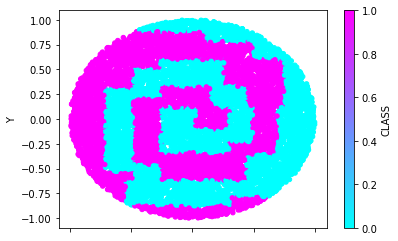

In [71]:
from sklearn.tree import DecisionTreeClassifier

df_600 = generate_dataframe(600, 1)

df_test = generate_dataframe(10000, 1)

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf.fit(df_600.loc[:,["X", "Y"]], df_600.loc[:,"CLASS"])
pred_600 = clf.predict(df_test.loc[:,["X", "Y"]])
df_test['CLASS'] = pred_600
df_test.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')

<AxesSubplot:xlabel='X', ylabel='Y'>

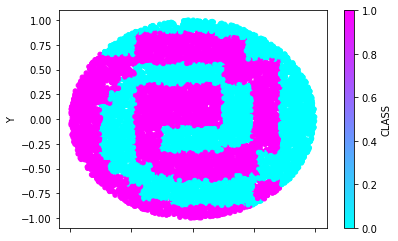

In [72]:
from sklearn.tree import DecisionTreeClassifier

df_3000 = generate_dataframe(3000, 1)

df_test = generate_dataframe(10000, 1)

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf.fit(df_3000.loc[:,["X", "Y"]], df_3000.loc[:,"CLASS"])
pred_3000 = clf.predict(df_test.loc[:,["X", "Y"]])
df_test['CLASS'] = pred_3000
df_test.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool')

# Ejercicio 1
Comparemos los graficos obtenidos con el grafico que es genereado por la funcion del tp anterior

![TP0](./output.png)

Como podemos ver, el grafico obtenido por el conjunto de entrenamiento de 150 puntos es completamente distinto al grafico que teniamos como objetivo. No podemos encontrar ninguna similitud.

A diferencia de esto, el grafico obtenido por el conjunto de entrenamiento de 600 puntos podemos ver que se aproxima un poco a lo que estamos buscando, se nota la forma de un espiral pero sigue siendo distinto al grafico objetivo.

Por ultimo, el grafico que mas se acerca al espiral que teniamos como objetivo es el grafico generado por el cojunto de entrenamiento de 3000 puntos.

Podemos concluir que a medida que aumentamos el conjunto de entrenamiento, el resultado va a ser mas cercano al espiral que queriamos llegar. Es decir, si generamos un conjunto de entrenamiento mayor a los que teniamos, podemos obtener un mejor resultado.

# Ejercicio 2 - Datos Diagonal

In [3]:
from pandas import DataFrame
import numpy as np

def create_points_a(d: int, n: int, C: float) -> DataFrame:
    '''
    create_points_a: int -> int -> float -> DataFrame
    d: Dimension de los puntos
    n: Cantidad de puntos a crear
    C: Flotante para calcular la desviación estándar

    '''
    
    center0, center1 = np.array([-1]*d), np.array([1]*d)
    cov = np.diag([(C*np.sqrt(d))**2]*d)
    mid = n // 2

    # Generate randoms points
    class0 = np.random.multivariate_normal(center0, cov, mid)
    class1 = np.random.multivariate_normal(center1, cov, n-mid)
    
    # Add class column
    class0 = np.c_[class0, np.zeros(mid)]
    class1 = np.c_[class1, np.ones(n-mid)]
    dataframe: DataFrame = DataFrame(data=np.r_[class0, class1], columns=list(range(d))+['CLASS'])

    return dataframe

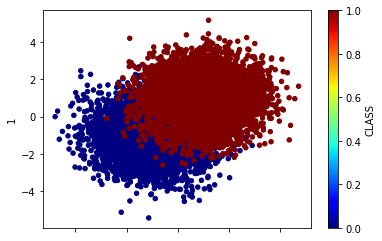

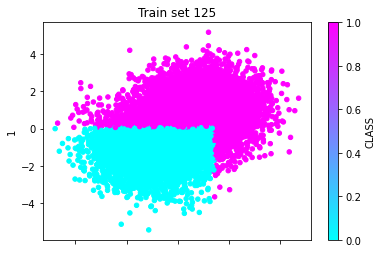

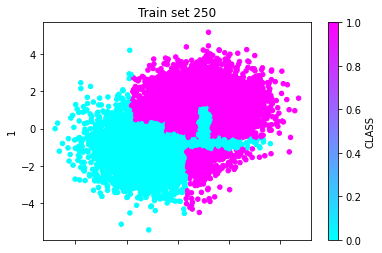

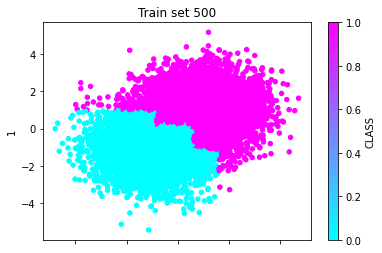

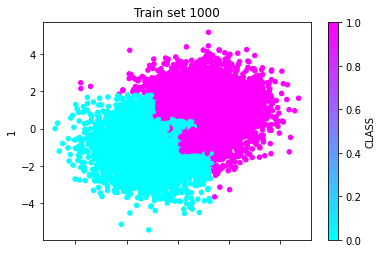

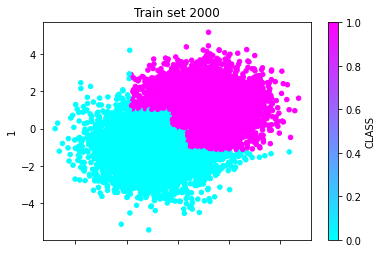

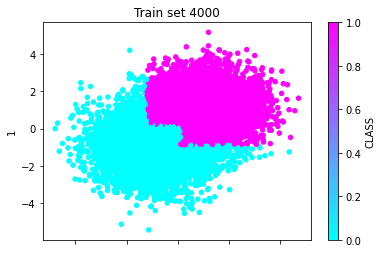

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

diag_df_test = create_points_a(2, 10000, .78)
n_vals = [125, 250, 500, 1000, 2000, 4000]

diag_error_train = []
diag_error_test = []
diag_size = []
diag_preds = []

for n in n_vals:
    error_train_ = []
    error_test_ = []
    size_ = []
    for _ in range(20):
        df_train = create_points_a(2, n, .78)

        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf.fit(df_train.loc[:,[0, 1]], df_train.loc[:,"CLASS"])

        size_.append(clf.tree_.node_count)
        error_train_.append(1-accuracy_score(df_train.loc[:,"CLASS"], clf.predict(df_train.loc[:,[0, 1]])))
        
        pred = clf.predict(diag_df_test.loc[:,[0, 1]])
        error_test_.append(1-accuracy_score(diag_df_test.loc[:,"CLASS"], pred))

        if _ == 10:
            diag_preds.append((pred, n))
    
    # Calculamos mean de cada valor
    diag_error_train.append(sum(error_train_)/20)
    diag_error_test.append(sum(error_test_)/20)
    diag_size.append(sum(size_)/20)


diag_df_test.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='jet')
for pred, n in diag_preds:
    df = diag_df_test
    df['CLASS'] = pred
    df.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool', title=f"Train set {n}")

# Conclusiones Datos Diagonal

En los distintos graficos podemos observar como el arbol intenta separar los puntos en las 2 clases.

Al principio notemos como el arbol no es tan preciso para clasificar los puntos, en le train set 250, no se puede ver una clasificacion clara. Se ven 2 grupos de puntos de clases 1 separados por una linea de puntos de clases 0.

Luego, a medida que aumenta el train set se puede ver claramente una clasificacion de los puntos. En casi todos los graficos, se puede ver la clasiificacion escalonada que se forma. Se puede notar que a medida que aumenta la cantidad de puntos, se produce una pequeña mejora en la clasificacion.

# Ejercicio 2 - Datos Paralelo

In [2]:
from pandas import DataFrame
import numpy as np

# Ejercicio b)
def create_points_b(d: int, n: int, C: float) -> DataFrame:
    '''
    create_points_b: int -> int -> float -> DataFrame
    d: Dimension de los puntos
    n: Cantidad de puntos a crear
    C: Flotante para calcular la desviación estándar

    '''
    
    center0, center1 = np.array([-1]+[0]*(d-1)), np.array([1]+[0]*(d-1))
    cov = np.diag([C**2]*d)
    mid = n // 2

    # GGeneramos los puntos alertorios
    class0 = np.random.multivariate_normal(center0, cov, mid)
    class1 = np.random.multivariate_normal(center1, cov, n-mid)
    
    # Agregamos la columna de clases
    class0 = np.c_[class0, np.zeros(mid)]
    class1 = np.c_[class1, np.ones(n-mid)]

    # Creamos el DataFrame
    dataframe: DataFrame = DataFrame(data=np.r_[class0, class1], columns=list(range(d))+['CLASS'])

    return dataframe

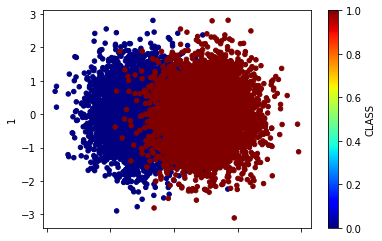

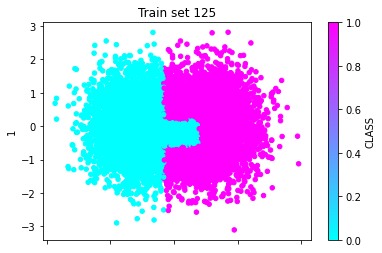

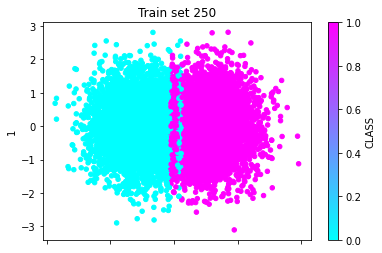

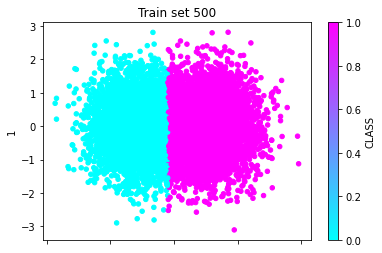

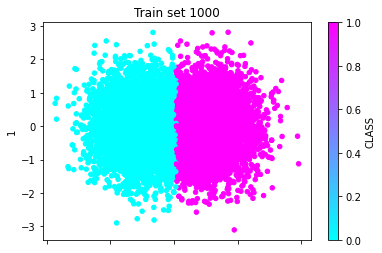

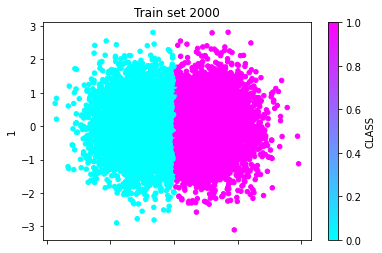

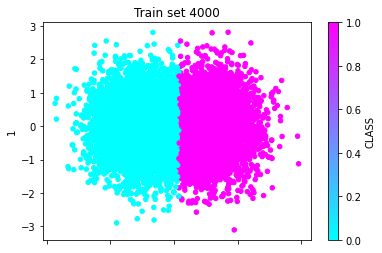

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

paral_df_test = create_points_b(2, 10000, .78)
n_vals = [125, 250, 500, 1000, 2000, 4000]

paral_error_train = []
paral_error_test = []
paral_size = []
paral_preds = []

for n in n_vals:
    error_train_ = []
    error_test_ = []
    size_ = []
    for _ in range(20):
        df_train = create_points_b(2, n, .78)

        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf.fit(df_train.loc[:,[0, 1]], df_train.loc[:,"CLASS"])

        size_.append(clf.tree_.node_count)
        error_train_.append(1-accuracy_score(df_train.loc[:,"CLASS"], clf.predict(df_train.loc[:,[0, 1]])))
        
        pred = clf.predict(paral_df_test.loc[:,[0, 1]])
        error_test_.append(1-accuracy_score(paral_df_test.loc[:,"CLASS"], pred))

        if _ == 10:
            paral_preds.append((pred, n))
    
    # Calculamos mean de cada valor
    paral_error_train.append(sum(error_train_)/20)
    paral_error_test.append(sum(error_test_)/20)
    paral_size.append(sum(size_)/20)


paral_df_test.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='jet')
for pred, n in paral_preds:
    df = paral_df_test
    df['CLASS'] = pred
    df.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool', title=f"Train set {n}")

# Conclusiones Datos Paralelo

Este problema, en comparacion al de los datos diagonales, se puede notar en los graficos la mejora del arbol de forma temprana.

En el train set 150, 250 se puede notar un intento de separacion de las clases. Pero luego, a medida que aumenta el train set, se puede notar que mejora un poco. En el train set 500 se produce la separacion de las clases pero luego, cuando aumentamos la cantidad de puntos, no se nota mucha mejora.

Podemos concluir que para este problema, no necesitamos un train set muy grande para poder clasificar los puntos.

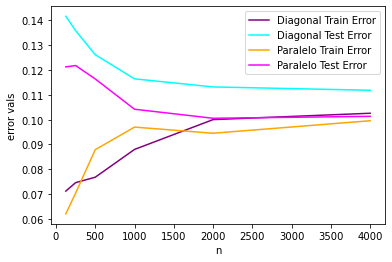

In [77]:
import matplotlib.pyplot as plt

plt.plot(n_vals, diag_error_train, 'purple')
plt.plot(n_vals, diag_error_test, 'cyan')
plt.plot(n_vals, paral_error_train, 'orange')
plt.plot(n_vals, paral_error_test, 'magenta')
plt.xlabel('n')
plt.ylabel('error vals')
plt.legend(['Diagonal Train Error', 'Diagonal Test Error', 'Paralelo Train Error', 'Paralelo Test Error'])

# Train Error y Test Error
De este grafico podemos notar que el error de test es menor en el problema paralelo en comparacion al diagonal.

Tambien se puede notar que en el problema diagonal, el error de test es bastante mayor al error de train. Esto indica que en este problema no se produjo sobreajuste.

Luego por otro lado, en el problema paralelo, el error de test es mayor al error de train, pero la diferencia no es tan significativa como el problema diagonal. A lo largo de la grafica, a medida que aumenta el `n`, el valor del error de test y el error de train estan bastante cerca, casi al punto de indicar que se produce sobreajuste, pero como el test error es mayor al train erro, no se produjo.

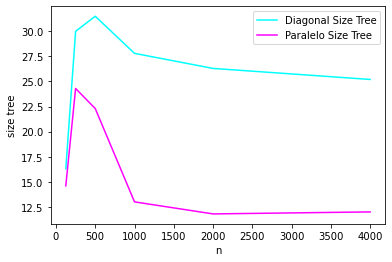

In [78]:
import matplotlib.pyplot as plt

plt.plot(n_vals, diag_size, 'cyan')
plt.plot(n_vals, paral_size, 'magenta')
plt.xlabel('n')
plt.ylabel('size tree')
plt.legend(['Diagonal Size Tree', 'Paralelo Size Tree'])

# Size del Tree

Como podemos ver en el grafico, la cantidad de nodos del diagonal tree, cuando el `n` va de 125 a 500 aumenta considerablemente y luego, a medida que sigue aumentando el `n`, la cantidad de nodos del tree disminuye un poco casi siendo constante (25 nodos aprox).

Al igual que el caso anterior, en el paralelo tree, se produce un aumento de la cantidad de nodos cuando el valor de `n` va de 125 a 500 y luego disminuye a medidida que el `n` aumenta.

Una de las principales diferencias que podemos ver es que siempre, para todo valor de `n`, el paralelo tree es mas chico que el diagonal tree, es decir, el paralelo tree no necesito perfeccionar mucho el arbol como el diagonal tree

# Ejercicio 3

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Datos Diagonal

c_vals = [i*.5 for i in range(1,6)]

diag_error_test = []

for c in c_vals:
    df_test = create_points_a(5, 10000, c)

    error_test_ = []
    for _ in range(20):
        df_train = create_points_a(5, 250, c)

        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf.fit(df_train.loc[:,range(5)], df_train.loc[:,"CLASS"])
        
        pred = clf.predict(df_test.loc[:,range(5)])
        error_test_.append(1-accuracy_score(df_test.loc[:,"CLASS"], pred))
    
    # Calculamos mean de cada valor
    diag_error_test.append(sum(error_test_)/20)

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Datos Paralelo

c_vals = [i*.5 for i in range(1,6)]

paral_error_test = []

for c in c_vals:
    df_test = create_points_b(5, 10000, c)

    error_test_ = []
    for _ in range(20):
        df_train = create_points_b(5, 250, c)

        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf.fit(df_train.loc[:,range(5)], df_train.loc[:,"CLASS"])
        
        pred = clf.predict(df_test.loc[:,range(5)])
        error_test_.append(1-accuracy_score(df_test.loc[:,"CLASS"], pred))
    
    # Calculamos mean de cada valor
    paral_error_test.append(sum(error_test_)/20)

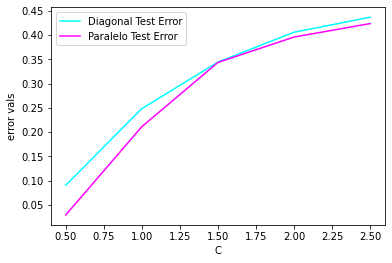

In [81]:
import matplotlib.pyplot as plt

plt.plot(c_vals, diag_error_test, 'cyan')
plt.plot(c_vals, paral_error_test, 'magenta')
plt.xlabel('C')
plt.ylabel('error vals')
plt.legend(['Diagonal Test Error', 'Paralelo Test Error'])

# Conclusion

Como podemos notar en el grafico y es algo que se estuvo dando a lo largo del trabajo practico es que el error de test del problema paralelo es siempre menor al error del test del problema diagonal. Pero se puede ver que cuando `C` es 1.50 ambos problemas tienen el mismo valor de error, 0.35

# Ejercicio 4

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Datos Diagonal

d_vals = [2, 4, 8, 16, 32]

diag_error_train = []
diag_error_test = []

for d in d_vals:
    df_test = create_points_a(d, 10000, .78)

    error_train_ = []
    error_test_ = []
    for _ in range(20):
        df_train = create_points_a(d, 250, .78)

        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf.fit(df_train.loc[:,range(d)], df_train.loc[:,"CLASS"])

        error_train_.append(1-accuracy_score(df_train.loc[:,"CLASS"], clf.predict(df_train.loc[:,range(d)])))
        
        pred = clf.predict(df_test.loc[:,range(d)])
        error_test_.append(1-accuracy_score(df_test.loc[:,"CLASS"], pred))
    
    # Calculamos mean de cada valor
    diag_error_train.append(sum(error_train_)/20)
    diag_error_test.append(sum(error_test_)/20)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Paralelo Diagonal

d_vals = [2, 4, 8, 16, 32]

paral_error_train = []
paral_error_test = []

for d in d_vals:
    df_test = create_points_b(d, 10000, .78)

    error_train_ = []
    error_test_ = []
    for _ in range(20):
        df_train = create_points_b(d, 250, .78)

        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
        clf.fit(df_train.loc[:,range(d)], df_train.loc[:,"CLASS"])

        error_train_.append(1-accuracy_score(df_train.loc[:,"CLASS"], clf.predict(df_train.loc[:,range(d)])))
        
        pred = clf.predict(df_test.loc[:,range(d)])
        error_test_.append(1-accuracy_score(df_test.loc[:,"CLASS"], pred))

    
    # Calculamos mean de cada valor
    paral_error_train.append(sum(error_train_)/20)
    paral_error_test.append(sum(error_test_)/20)

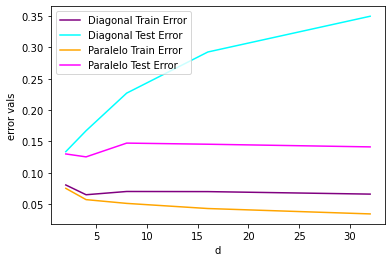

In [87]:
import matplotlib.pyplot as plt

plt.plot(d_vals, diag_error_train, 'purple')
plt.plot(d_vals, diag_error_test, 'cyan')
plt.plot(d_vals, paral_error_train, 'orange')
plt.plot(d_vals, paral_error_test, 'magenta')
plt.xlabel('d')
plt.ylabel('error vals')
plt.legend(['Diagonal Train Error', 'Diagonal Test Error', 'Paralelo Train Error', 'Paralelo Test Error'])

# Conclusion

Se puede notar que el error de test del problema diagonal es mucho mayor que el error de test del problema paralelo. Se nota que a medida que aumentamos la dimension de los puntos, el error de test diagonal incrementa de forma pronunciada, al contrario al error de test paralelo se mantiene casi constante.

Luego tambien se puede destacar que en ambos problemas, el error de train es menor al error de test y esto indica que en ambos problemas no se produjo sobreajuste.

# Ejercicio 5


El error de prediccion es 0.45999999999999996


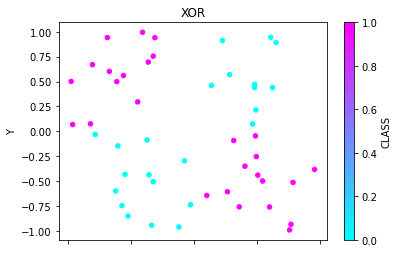

In [115]:
from pandas import DataFrame, read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


df_xor = read_csv('xor.csv', names=['X', 'Y', 'CLASS'])
x_train, x_test, y_train, y_test = train_test_split(df_xor.loc[:,['X', 'Y']], df_xor.loc[:,'CLASS'] , random_state=0)
clf_xor = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)
clf_xor.fit(x_train, y_train)
pred = clf_xor.predict(x_test)
x_test['CLASS'] = y_test
x_test['PRED'] = pred
x_test.plot(x='X', y='Y', kind='scatter', c='CLASS', colormap='cool', title='XOR')
print(f"El error de prediccion es {1-accuracy_score(y_test, pred)}")


# Conclusiones

El arbol mas simple para clasificar este dataset es aquel que genera 2 lineas clasificadoras que se cruzan en el (0,0), separando los 4 sectores y de esta forma, clasificando los puntos en las clases que tenemos.

Como podemos ver la grafica de prediccion, el arbol clasifica de forma correcta, teniendo un error de test de 0.459. Se puede ver una clasificacion clara en los 2 grupos de clases. Capaz con un mayor conjunto de entrenamiento, podremos obtener un arbol mas preciso.
